# Homework 3 - Chapter 4

This is the initail copy of code from Chapter 4

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


In [2]:
max([max(sequence) for sequence in train_data])

9999

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[2]])

1641221/1641221 [==============================] - 0s 0us/step


In [6]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

# x corresponds to the data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(x_train.shape)

(25000, 10000)


In [11]:
# y corresponds to the labells
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")
print(y_train.shape)

(25000,)


**1) Change the model to use one hidden (aka "representation") layer, and see how this affects validation and test accuracy.  Show this by plotting them (on the same plot, like in the book).  Repeat this for three hidden layers.  Comment on any differences you find, as well as what you'd expect.**


**Part 1 - One Layer Model**

In [43]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict_onelayer = history.history
history_dict_onelayer.keys()

Epoch 1/20
30/30 [==============================] - 2s 55ms/step - loss: 0.5210 - accuracy: 0.7845 - val_loss: 0.4118 - val_accuracy: 0.8694
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3324 - accuracy: 0.9015 - val_loss: 0.3362 - val_accuracy: 0.8756
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2534 - accuracy: 0.9251 - val_loss: 0.3053 - val_accuracy: 0.8838
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2096 - accuracy: 0.9385 - val_loss: 0.2881 - val_accuracy: 0.8870
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1758 - accuracy: 0.9486 - val_loss: 0.2754 - val_accuracy: 0.8896
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1514 - accuracy: 0.9578 - val_loss: 0.2786 - val_accuracy: 0.8882
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1311 - accuracy: 0.9631 - val_loss: 0.2798 - val_accuracy: 0.8873
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<br>

### Results of Model with One Layer

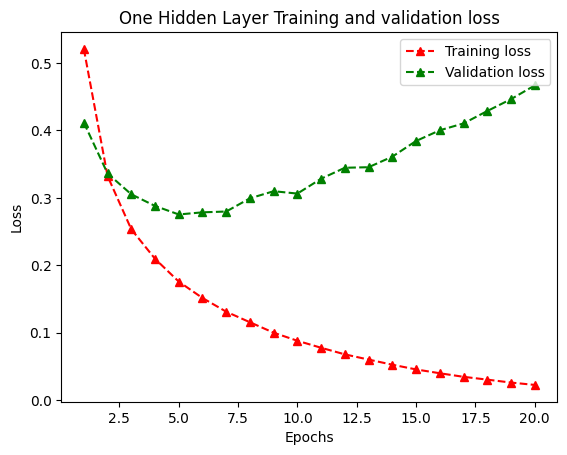

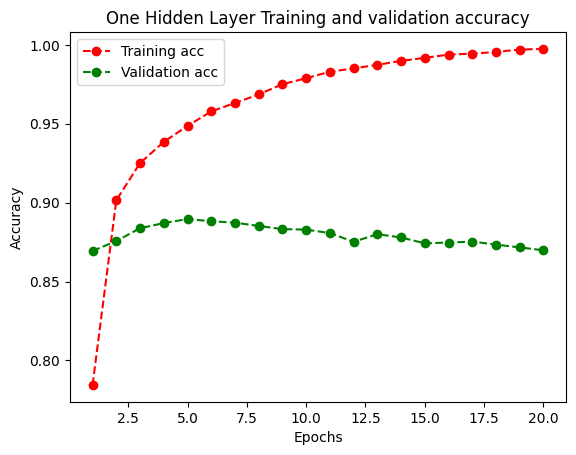

In [44]:
import matplotlib.pyplot as plt

# Training Loss vs Validatin Loss 
loss_values = history_dict_onelayer["loss"]
val_loss_values = history_dict_onelayer["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, label="Training loss", color = 'red', linestyle='--', marker = '^')
plt.plot(epochs, val_loss_values, label="Validation loss", color = 'green', linestyle='--', marker = '^')
plt.title("One Hidden Layer Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()

# Training Accuracy vs. Validation Accuracy
acc = history_dict_onelayer["accuracy"]
val_acc = history_dict_onelayer["val_accuracy"]
plt.plot(epochs, acc, label="Training acc", color='red', linestyle='--', marker='o')
plt.plot(epochs, val_acc, label="Validation acc", color='green', linestyle='--', marker='o')
plt.title("One Hidden Layer Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Part 2 - 3 Layer Model**

In [45]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict_threelayers = history.history
history_dict_threelayers.keys()

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.5147 - accuracy: 0.7779 - val_loss: 0.3590 - val_accuracy: 0.8741
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2827 - accuracy: 0.9038 - val_loss: 0.2842 - val_accuracy: 0.8898
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2026 - accuracy: 0.9299 - val_loss: 0.2722 - val_accuracy: 0.8916
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1596 - accuracy: 0.9474 - val_loss: 0.2811 - val_accuracy: 0.8904
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1314 - accuracy: 0.9554 - val_loss: 0.2976 - val_accuracy: 0.8885
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1001 - accuracy: 0.9692 - val_loss: 0.3251 - val_accuracy: 0.8812
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0821 - accuracy: 0.9760 - val_loss: 0.3854 - val_accuracy: 0.8733
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

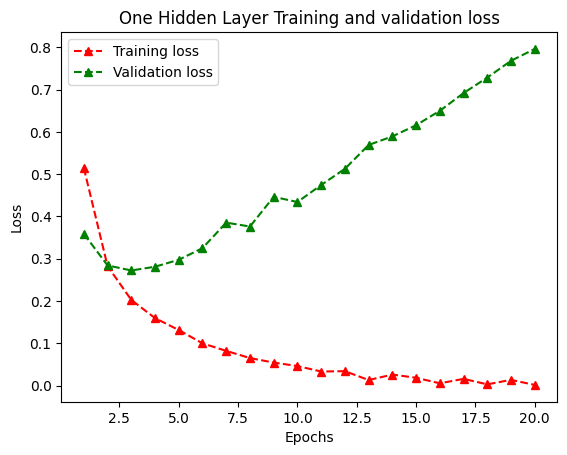

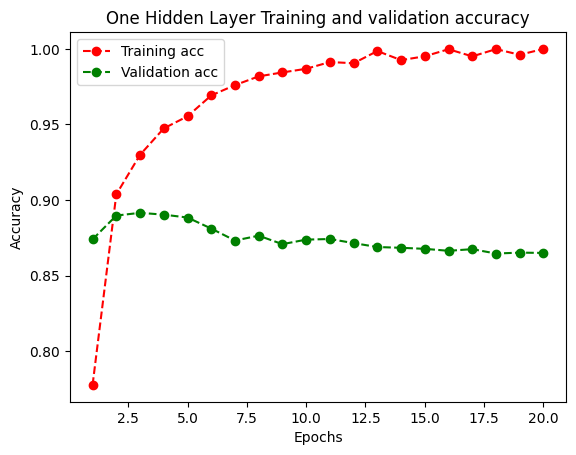

In [46]:
import matplotlib.pyplot as plt

# Training Loss vs Validatin Loss 
loss_values = history_dict_threelayers["loss"]
val_loss_values = history_dict_threelayers["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, label="Training loss", color = 'red', linestyle='--', marker = '^')
plt.plot(epochs, val_loss_values, label="Validation loss", color = 'green', linestyle='--', marker = '^')
plt.title("One Hidden Layer Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()

# Training Accuracy vs. Validation Accuracy
acc = history_dict_threelayers["accuracy"]
val_acc = history_dict_threelayers["val_accuracy"]
plt.plot(epochs, acc, label="Training acc", color='red', linestyle='--', marker='o')
plt.plot(epochs, val_acc, label="Validation acc", color='green', linestyle='--', marker='o')
plt.title("One Hidden Layer Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**The cumulative plot**

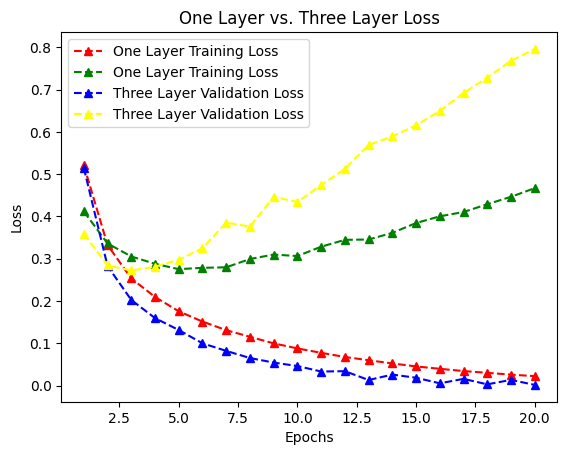

<Figure size 640x480 with 0 Axes>

In [66]:
loss_values = [
    history_dict_onelayer['loss'],
    history_dict_onelayer['val_loss'],
    history_dict_threelayers['loss'],
    history_dict_threelayers['val_loss']
]

acc_values = [
    history_dict_onelayer['accuracy'],
    history_dict_onelayer['val_accuracy'],
    history_dict_threelayers['accuracy'],
    history_dict_threelayers['val_accuracy']
]

loss_labels = ['One Layer ', 'Three Layer ', 'Training Loss', 'Validation Loss']
colors = ['red', 'green', 'blue', 'yellow']

for idx, x in enumerate(loss_values):
    plt.plot(epochs, x, label=loss_labels[int(idx/2)] + loss_labels[int(idx/2) + 2], 
             color=colors[idx], linestyle='--', marker = '^')
    
plt.title("One Layer vs. Three Layer Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()

2) Try changing the number of nodes in the hidden layers to 100.  See how this affects validation and test accuracy.  Show this by plotting them (on the same plot, like in the book). 
## Part 1

In [21]:
model = keras.Sequential([
    layers.Dense(100, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [22]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [23]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 29ms/step - loss: 0.4589 - accuracy: 0.7937 - val_loss: 0.3192 - val_accuracy: 0.8803
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2585 - accuracy: 0.9062 - val_loss: 0.2828 - val_accuracy: 0.8886
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1884 - accuracy: 0.9359 - val_loss: 0.2730 - val_accuracy: 0.8938
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1477 - accuracy: 0.9491 - val_loss: 0.2814 - val_accuracy: 0.8880
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1237 - accuracy: 0.9585 - val_loss: 0.3104 - val_accuracy: 0.8824
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0996 - accuracy: 0.9681 - val_loss: 0.3111 - val_accuracy: 0.8847
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0777 - accuracy: 0.9773 - val_loss: 0.4080 - val_accuracy: 0.8596
Epoch 8/20
30

In [24]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<class 'list'>


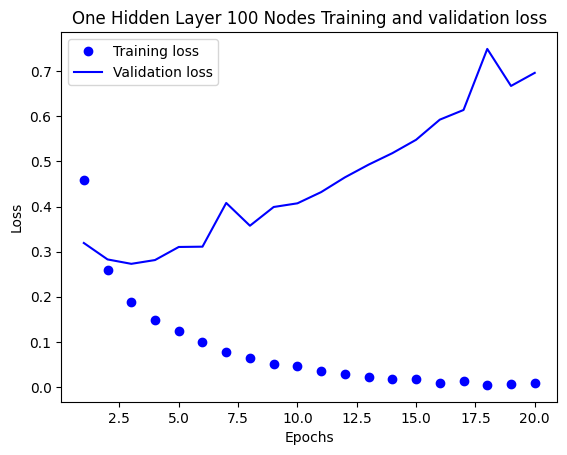

In [25]:

history_dict = history.history
loss_values = history_dict["loss"]
print(type(loss_values))
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("One Hidden Layer 100 Nodes Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

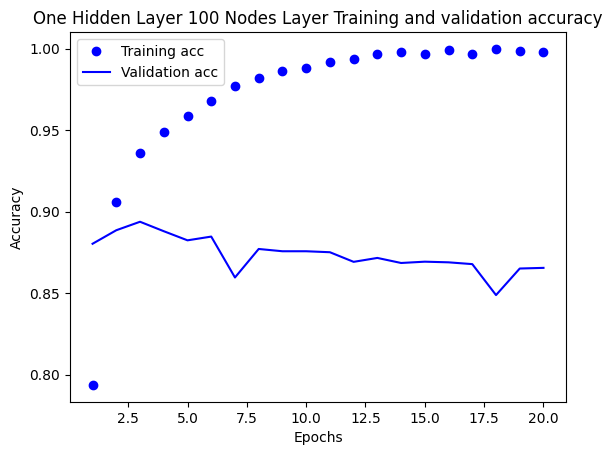

In [26]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("One Hidden Layer 100 Nodes Layer Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Part 2

In [27]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [28]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [29]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 17ms/step - loss: 0.5521 - accuracy: 0.7708 - val_loss: 0.4128 - val_accuracy: 0.8690
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3281 - accuracy: 0.8964 - val_loss: 0.3107 - val_accuracy: 0.8869
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2268 - accuracy: 0.9280 - val_loss: 0.3367 - val_accuracy: 0.8609
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1737 - accuracy: 0.9450 - val_loss: 0.2992 - val_accuracy: 0.8794
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1401 - accuracy: 0.9551 - val_loss: 0.3115 - val_accuracy: 0.8804
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1091 - accuracy: 0.9663 - val_loss: 0.3304 - val_accuracy: 0.8794
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0915 - accuracy: 0.9711 - val_loss: 0.3326 - val_accuracy: 0.8829
Epoch 8/20
30/3

In [30]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<class 'list'>


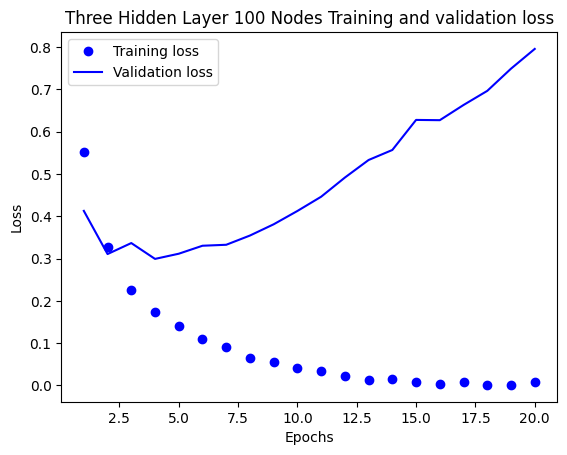

In [31]:

history_dict = history.history
loss_values = history_dict["loss"]
print(type(loss_values))
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Three Hidden Layer 100 Nodes Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

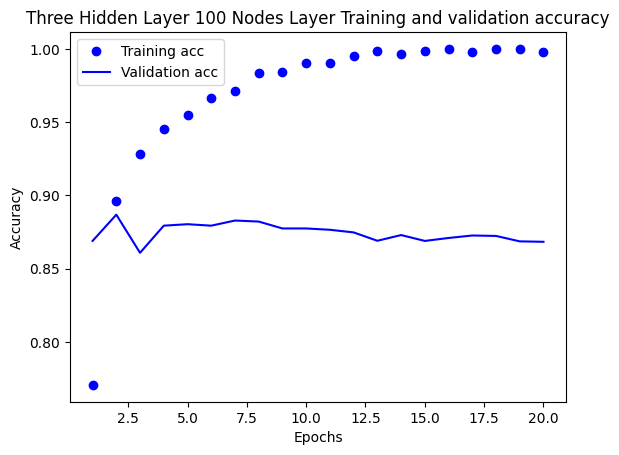

In [32]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Three Hidden Layer 100 Nodes Layer Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

3) Evaluate the test accuracy of the model before any training has taken place.  Compare this to the accuracy post-training, and comment on whether or not this is what you'd expect.

## Part 1(a): One Hidden Layer 16 Nodes Pre Training    

In [33]:
pretraining_data = []
posttraining_data = []
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
part_1_a = model.evaluate(x_test, y_test)
pretraining_data.append(part_1_a[1])
print (part_1_a)

782/782 [==============================] - 1s 738us/step - loss: 0.6955 - accuracy: 0.5011
[0.6955227255821228, 0.5010799765586853]


782/782 [==============================] - 0s 546us/step


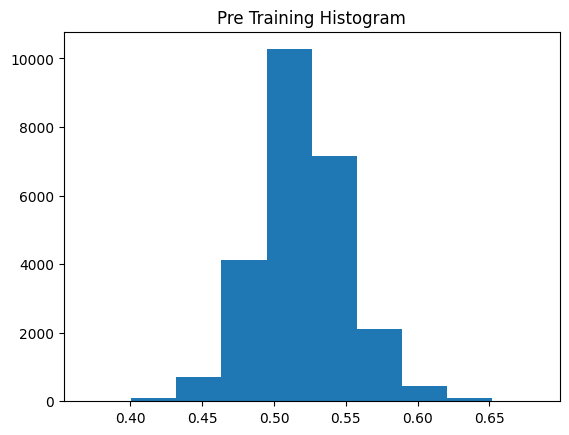

In [34]:
pre_prediction = model.predict(x_test)
plt.hist(pre_prediction, bins=10)
plt.gca().set(title='Pre Training Histogram');

## Part 1(b): One Hidden Layer 16 Nodes After Training

In [35]:
model.fit(x_train, y_train, epochs = 4, batch_size=512)
part_1_b = model.evaluate(x_test, y_test)
posttraining_data.append(part_1_b[1])
print(part_1_b)

Epoch 1/4
49/49 [==============================] - 1s 7ms/step - loss: 0.4428 - accuracy: 0.8320
Epoch 2/4
49/49 [==============================] - 0s 6ms/step - loss: 0.2748 - accuracy: 0.9082
Epoch 3/4
49/49 [==============================] - 0s 6ms/step - loss: 0.2198 - accuracy: 0.9255
Epoch 4/4
782/782 [==============================] - 1s 689us/step - loss: 0.2833 - accuracy: 0.8863
[0.2833358943462372, 0.8863199949264526]


782/782 [==============================] - 0s 556us/step


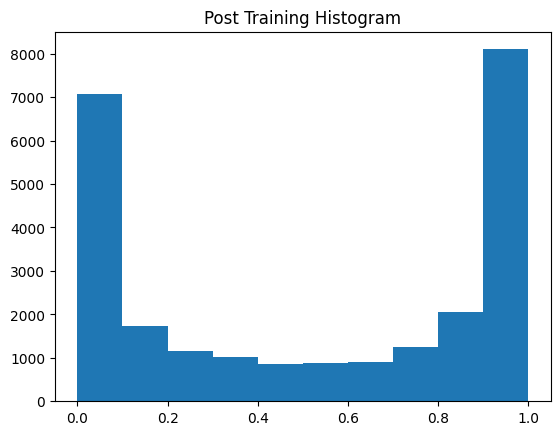

In [36]:
post_prediction = model.predict(x_test)
plt.hist(post_prediction, bins=10)
plt.gca().set(title='Post Training Histogram');

## Part 2(a): Three Hidden Layers 16 Nodes Pre Training

In [37]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
part_2_a = model.evaluate(x_test, y_test)
pretraining_data.append(part_2_a[1])
print (part_2_a)

782/782 [==============================] - 1s 673us/step - loss: 0.6957 - accuracy: 0.4868
[0.6957413554191589, 0.4867999851703644]


782/782 [==============================] - 0s 583us/step


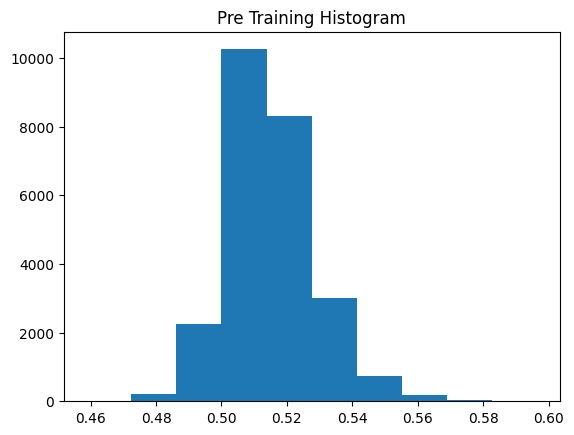

In [38]:
pre_prediction = model.predict(x_test)
plt.hist(pre_prediction, bins=10)
plt.gca().set(title='Pre Training Histogram')

## Part 2(b): Three Hidden Layers 16 Nodes After Training

In [44]:
model.fit(x_train, y_train, epochs = 4, batch_size=512)
part_2_b = model.evaluate(x_test, y_test)
posttraining_data.append(part_2_b[1])
print(part_2_b)

Epoch 1/4
49/49 [==============================] - 1s 22ms/step - loss: 0.0655 - accuracy: 0.9777
Epoch 2/4
49/49 [==============================] - 1s 24ms/step - loss: 0.0600 - accuracy: 0.9834
Epoch 3/4
49/49 [==============================] - 1s 23ms/step - loss: 0.0082 - accuracy: 0.9982
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.7159 - accuracy: 0.8707
[0.7159156799316406, 0.8707200288772583]


782/782 [==============================] - 1s 1ms/step


[Text(0.5, 1.0, 'Pre Training Histogram')]

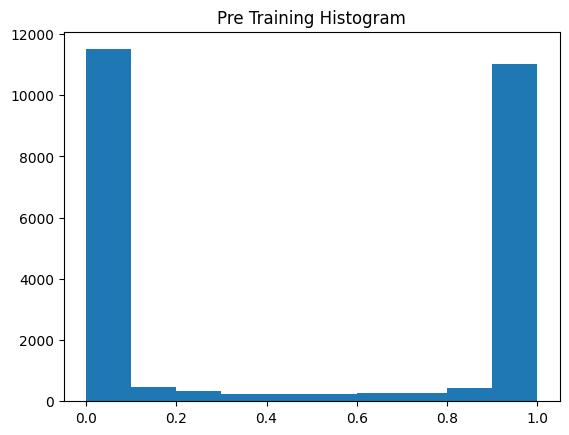

In [45]:
post_prediction = model.predict(x_test)
plt.hist(post_prediction, bins=10)
plt.gca().set(title='Pre Training Histogram')

## Part 3(a): One Hidden Layer 1000 Nodes Pre Training

In [46]:
model = keras.Sequential([
    layers.Dense(100, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
part_3_a = model.evaluate(x_test, y_test)
pretraining_data.append(part_3_a[1])
print (part_3_a)

782/782 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5193
[0.6921026706695557, 0.5192800164222717]


782/782 [==============================] - 1s 1ms/step


[Text(0.5, 1.0, 'Pre Training Histogram')]

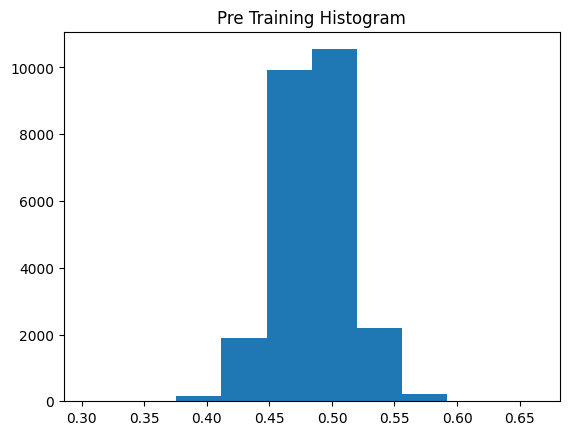

In [47]:
pre_prediction = model.predict(x_test)
plt.hist(pre_prediction, bins=10)
plt.gca().set(title='Pre Training Histogram')

## Part 3(b): One Hidden Layer 1000 Nodes After Training

In [48]:
model.fit(x_train, y_train, epochs = 4, batch_size=512)
part_3_b = model.evaluate(x_test, y_test)
posttraining_data.append(part_3_b[1])
print(part_3_b)

Epoch 1/4
49/49 [==============================] - 1s 15ms/step - loss: 0.4046 - accuracy: 0.8277
Epoch 2/4
49/49 [==============================] - 1s 22ms/step - loss: 0.2368 - accuracy: 0.9128
Epoch 3/4
49/49 [==============================] - 1s 22ms/step - loss: 0.1847 - accuracy: 0.9318
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3061 - accuracy: 0.8799
[0.3060572147369385, 0.8798800110816956]


782/782 [==============================] - 1s 1ms/step


[Text(0.5, 1.0, 'Pre Training Histogram')]

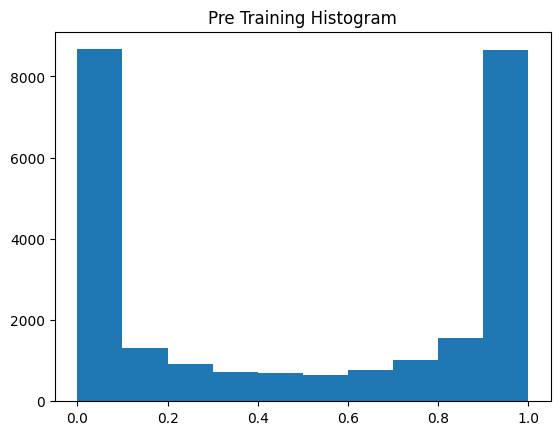

In [49]:
post_prediction = model.predict(x_test)
plt.hist(post_prediction, bins=10)
plt.gca().set(title='Pre Training Histogram')

## Part 4(a): Three Hidden Layers 1000 Nodes Pre Training

In [50]:
model = keras.Sequential([
    layers.Dense(100, activation="relu"),
    layers.Dense(100, activation="relu"),
    layers.Dense(100, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
part_4_a = model.evaluate(x_test, y_test)
pretraining_data.append(part_4_a[1])
print (part_4_a)

782/782 [==============================] - 1s 1ms/step - loss: 0.6932 - accuracy: 0.5117
[0.6931997537612915, 0.511680006980896]


782/782 [==============================] - 1s 1ms/step


[Text(0.5, 1.0, 'Pre Training Histogram')]

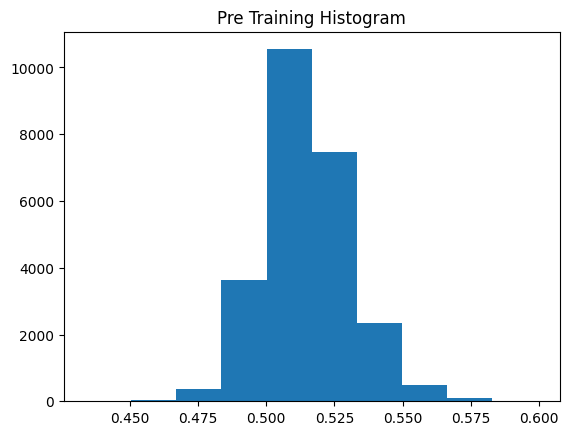

In [51]:
pre_prediction = model.predict(x_test)
plt.hist(pre_prediction, bins=10)
plt.gca().set(title='Pre Training Histogram')

## Part 4(b): Three Hidden Layers 1000 Nodes After Training

In [52]:
model.fit(x_train, y_train, epochs = 4, batch_size=512)
part_4_b = model.evaluate(x_test, y_test)
posttraining_data.append(part_4_b[1])
print(part_4_b)

Epoch 1/4
49/49 [==============================] - 2s 23ms/step - loss: 0.4364 - accuracy: 0.8000
Epoch 2/4
49/49 [==============================] - 1s 23ms/step - loss: 0.2314 - accuracy: 0.9091
Epoch 3/4
49/49 [==============================] - 1s 22ms/step - loss: 0.1685 - accuracy: 0.9328
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3981 - accuracy: 0.8711
[0.3981011211872101, 0.8711199760437012]


782/782 [==============================] - 1s 1ms/step


[Text(0.5, 1.0, 'Pre Training Histogram')]

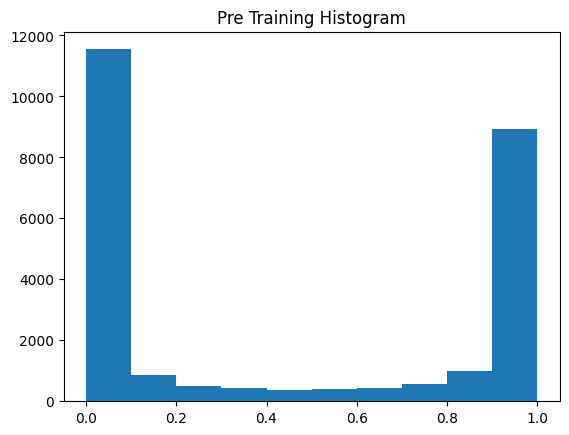

In [53]:
post_prediction = model.predict(x_test)
plt.hist(post_prediction, bins=10)
plt.gca().set(title='Pre Training Histogram')